1. Plotting $\varepsilon_{\ell}$ vs. $y$ for each gauge with linear regression

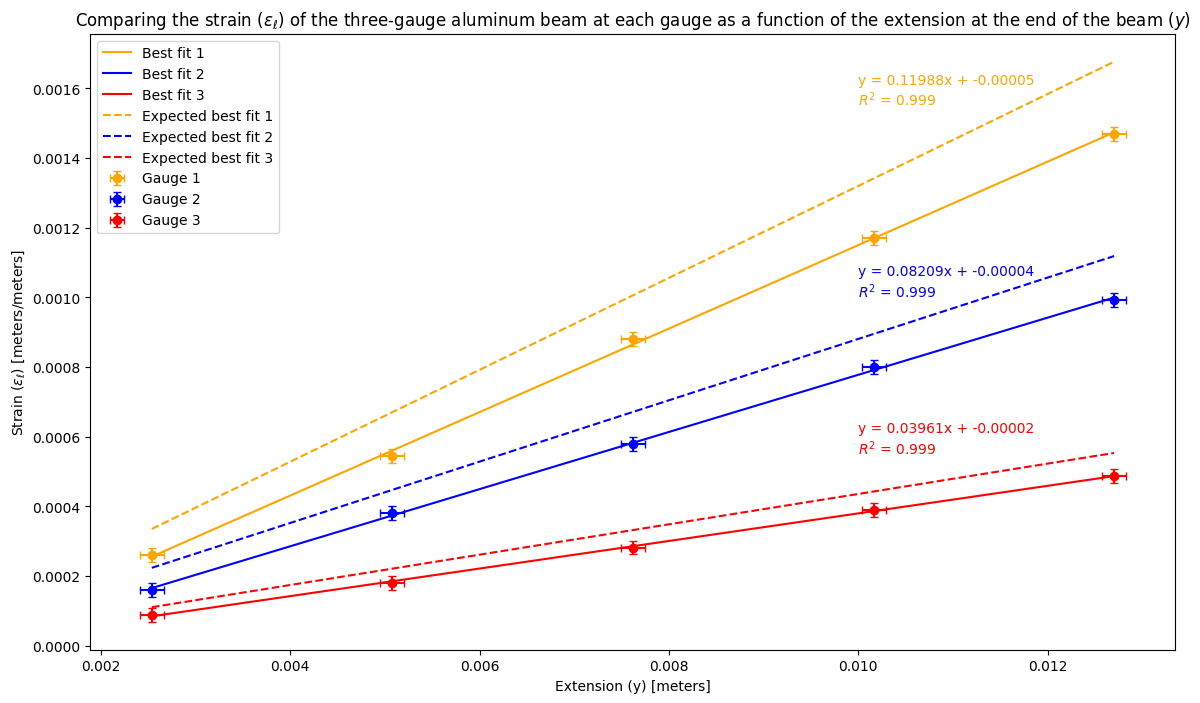

Expected slope for Gauge 1: 0.13202405111569604
Expected slope for Gauge 2: 0.08809310591082348
Expected slope for Gauge 3: 0.04358412195325517
------------------------------------
Slope for Gauge 1: 0.1198818897637795
Slope for Gauge 2: 0.08208661417322834
Slope for Gauge 3: 0.03960629921259842
------------------------------------
Percent error for Gauge 1: 9.196931354027344
Percent error for Gauge 2: 6.81834483583256
Percent error for Gauge 3: 9.126770397997333
------------------------------------
R-squared for Gauge 1: 0.9994637274981135
R-squared for Gauge 2: 0.999474193886579
R-squared for Gauge 3: 0.9994153825491692


In [103]:
import numpy as np
import matplotlib.pyplot as plt

y = np.array([0.1,
                0.2,
                0.3,
                0.4,
                0.5])
y = y * 0.0254 # convert to meters

err_y = 0.005 * 0.0254 # error in y

# Gauge 1
strain_1 = np.array([0.00026,
                     0.000545,
                     0.00088,
                     0.00117,
                     0.00147])

# Gauge 2
strain_2 = np.array([0.00016,
                     0.00038,
                     0.00058,
                     0.000801,
                     0.000992])

# Gauge 3
strain_3 = np.array([0.000089,
                     0.000181,
                     0.000282,
                     0.000389,
                     0.000488])

err_strain = 0.2 * 10**-4 # error in strain 1

# Performing linear regression and getting the slope and intercept
slope_1, intercept_1 = np.polyfit(y, strain_1, 1)
slope_2, intercept_2 = np.polyfit(y, strain_2, 1)
slope_3, intercept_3 = np.polyfit(y, strain_3, 1)

# Creating lines of best fit
best_fit_1 = slope_1 * y + intercept_1
best_fit_2 = slope_2 * y + intercept_2
best_fit_3 = slope_3 * y + intercept_3

# Plotting the data
plt.figure(figsize=(14, 8))

plt.errorbar(y, strain_1, xerr=err_y, yerr=err_strain, fmt='o', label='Gauge 1', color='orange', capsize=3)
plt.errorbar(y, strain_2, xerr=err_y, yerr=err_strain, fmt='o', label='Gauge 2', color='blue', capsize=3)
plt.errorbar(y, strain_3, xerr=err_y, yerr=err_strain, fmt='o', label='Gauge 3', color='red', capsize=3)

# Plotting lines of best fit
plt.plot(y, best_fit_1, '-', color='orange', label='Best fit 1')
plt.plot(y, best_fit_2, '-', color='blue', label='Best fit 2')
plt.plot(y, best_fit_3, '-', color='red', label='Best fit 3')

# Calculate R-squared values for each line of best fit
r_squared_1 = np.corrcoef(y, strain_1)[0, 1]**2
r_squared_2 = np.corrcoef(y, strain_2)[0, 1]**2
r_squared_3 = np.corrcoef(y, strain_3)[0, 1]**2

# Comparing the slopes with the expected slopes
a1 = 0.63 / 100 # thickness of the beam in m
b1 = 2.52 / 100 # width of the beam in m

d1 = 2.54 / 100 # distance from the clasp to gauge 1 in m
d2 = 10.14 / 100 # distance from the clasp to gauge 2 in m
d3 = 17.84 / 100 # distance from the clasp to gauge 3 in m

d_micrometer = 25.38 / 100 # distance from the clasp to the micrometer in m

def expected_strain(a, L, x, y):
    return (3*a*(L-x)*y) / (2 * L**3)

# Calculate expected strain for each y value for each gauge
expected_strain_1 = expected_strain(a1, d_micrometer, d1, y)
expected_strain_2 = expected_strain(a1, d_micrometer, d2, y)
expected_strain_3 = expected_strain(a1, d_micrometer, d3, y)

# Perform linear regression to get slope and intercept
expected_slope_1, expected_intercept_1 = np.polyfit(y, expected_strain_1, 1)
expected_slope_2, expected_intercept_2 = np.polyfit(y, expected_strain_2, 1)
expected_slope_3, expected_intercept_3 = np.polyfit(y, expected_strain_3, 1)

# Calculate the percent error
percent_error_1 = abs((slope_1 - expected_slope_1) / expected_slope_1) * 100
percent_error_2 = abs((slope_2 - expected_slope_2) / expected_slope_2) * 100
percent_error_3 = abs((slope_3 - expected_slope_3) / expected_slope_3) * 100

# Creating lines of best fit for expected strains
expected_best_fit_1 = expected_slope_1 * y + expected_intercept_1
expected_best_fit_2 = expected_slope_2 * y + expected_intercept_2
expected_best_fit_3 = expected_slope_3 * y + expected_intercept_3

# Plotting lines of best fit for expected strains
plt.plot(y, expected_best_fit_1, '--', color='orange', label='Expected best fit 1')
plt.plot(y, expected_best_fit_2, '--', color='blue', label='Expected best fit 2')
plt.plot(y, expected_best_fit_3, '--', color='red', label='Expected best fit 3')

# Adding equations and R^2 values for each line of best fit
plt.text(0.01, 0.00155, f'y = {slope_1:.5f}x + {intercept_1:.5f}\n$R^2$ = {r_squared_1:.3f}', color='orange')
plt.text(0.01, 0.0010, f'y = {slope_2:.5f}x + {intercept_2:.5f}\n$R^2$ = {r_squared_2:.3f}', color='blue')
plt.text(0.01, 0.00055, f'y = {slope_3:.5f}x + {intercept_3:.5f}\n$R^2$ = {r_squared_3:.3f}', color='red')

plt.title('Comparing the strain ($\\epsilon_{\\ell}$) of the three-gauge aluminum beam at each gauge as a function of the extension at the end of the beam ($y$)')
plt.xlabel('Extension (y) [meters]')
plt.ylabel('Strain ($\\epsilon_{\\ell}$) [meters/meters]')
plt.legend()
plt.show()

# Print the calculated slopes
print("Expected slope for Gauge 1:", expected_slope_1)
print("Expected slope for Gauge 2:", expected_slope_2)
print("Expected slope for Gauge 3:", expected_slope_3)

print('------------------------------------')

# Print the slopes from the linear regression
print("Slope for Gauge 1:", slope_1)
print("Slope for Gauge 2:", slope_2)
print("Slope for Gauge 3:", slope_3)

print('------------------------------------')

print("Percent error for Gauge 1:", percent_error_1)
print("Percent error for Gauge 2:", percent_error_2)
print("Percent error for Gauge 3:", percent_error_3)

print('------------------------------------')

# Print the R-squared values
print("R-squared for Gauge 1:", r_squared_1)
print("R-squared for Gauge 2:", r_squared_2)
print("R-squared for Gauge 3:", r_squared_3)

2. Plotting $\varepsilon_{\ell}$ as a function of $W$

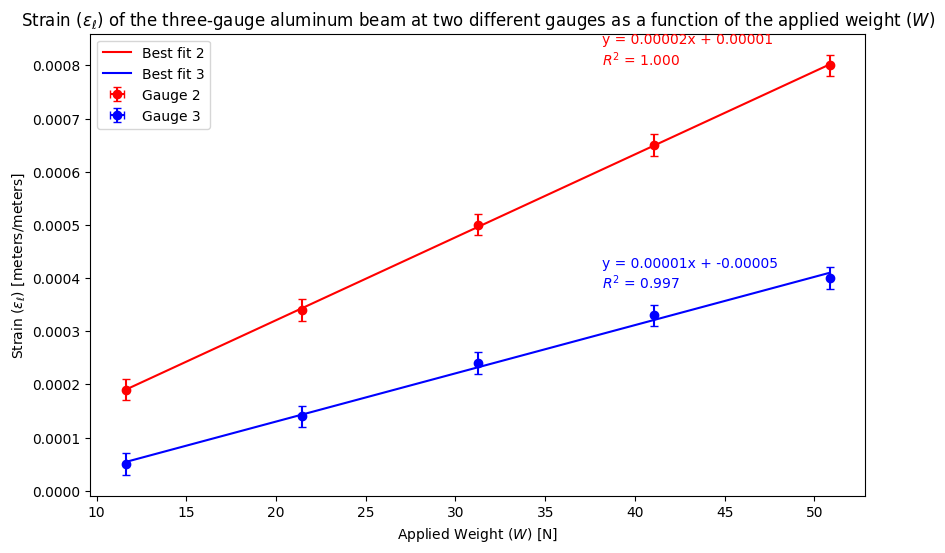

Slope for Gauge 2: 1.5596330275229354e-05
Slope for Gauge 3: 9.072375127420997e-06
------------------------------------
R-squared for Gauge 2: 0.9998718605843154
R-squared for Gauge 3: 0.9966029189733265
------------------------------------
Young's Modulus with Gauge 2: 575044112883.2487  Pa
Young's Modulus with Gauge 3: 489090204300.0184  Pa
------------------------------------
Young's Modulus for Gauge 2 in GPa: 575.0441128832487  GPa
Young's Modulus for Gauge 3 in GPa: 489.0902043000184  GPa


In [104]:
M = np.array([1.18505,2.18505,3.18505,4.18505,5.18505])
W = M * 9.81
err_W = 0.001 * 9.81

# Gauge 3
strain_3 = np.array([0.00005, 0.00014, 0.00024, 0.00033, 0.00040])

# Gauge 2
strain_2 = np.array([0.00019, 0.00034, 0.00050, 0.00065, 0.00080])

# Performing linear regression and getting the slope and intercept
slope_2, intercept_2 = np.polyfit(W, strain_2, 1)
slope_3, intercept_3 = np.polyfit(W, strain_3, 1)

# Creating lines of best fit
best_fit_2 = slope_2 * W + intercept_2
best_fit_3 = slope_3 * W + intercept_3

# Calculate R-squared values for each line of best fit
r_squared_2 = np.corrcoef(W, strain_2)[0, 1]**2
r_squared_3 = np.corrcoef(W, strain_3)[0, 1]**2

def y_exp(W, L, Y, a, b):
    return (12 * W * L**3) / (3 * Y  * (a**2 * b))

y_exp_2 = 1.75 * y_exp(W, 0.2857, 7e+8, a1, b1)
y_exp_3 = 1.5 * y_exp(W, 0.2857, 7e+8, a1, b1)

expected_strain_2 = expected_strain(a1, 0.2857, d2, y_exp_2)
expected_strain_3 = expected_strain(a1, 0.2857, d3, y_exp_3)

# Plotting the data
plt.figure(figsize=(10, 6))

plt.errorbar(W, strain_2, xerr=err_W, yerr=err_strain, fmt='o', label='Gauge 2', color='red', capsize=3)
plt.errorbar(W, strain_3, xerr=err_W, yerr=err_strain, fmt='o', label='Gauge 3', color='blue', capsize=3)

# Plotting lines of best fit
plt.plot(W, best_fit_2, '-', color='red', label='Best fit 2')
plt.plot(W, best_fit_3, '-', color='blue', label='Best fit 3')

# Plotting expected strains
# plt.plot(W, expected_strain_2, '--', color='red', label='Expected strain 2')
# plt.plot(W, expected_strain_3, '--', color='blue', label='Expected strain 3')

# Adding equations and R^2 values for each line of best fit
plt.text(max(W)*0.75, max(strain_2), f'y = {slope_2:.5f}x + {intercept_2:.5f}\n$R^2$ = {r_squared_2:.3f}', color='red')
plt.text(max(W)*0.75, max(strain_3)*0.95, f'y = {slope_3:.5f}x + {intercept_3:.5f}\n$R^2$ = {r_squared_3:.3f}', color='blue')

plt.title('Strain ($\\epsilon_{\\ell}$) of the three-gauge aluminum beam at two different gauges as a function of the applied weight ($W$)')
plt.xlabel('Applied Weight ($W$) [N]')
plt.ylabel('Strain ($\\epsilon_{\\ell}$) [meters/meters]')
plt.legend()
plt.show()

# Print the slopes and R-squared values
print("Slope for Gauge 2:", slope_2)
print("Slope for Gauge 3:", slope_3)
print('------------------------------------')
print("R-squared for Gauge 2:", r_squared_2)
print("R-squared for Gauge 3:", r_squared_3)
print('------------------------------------')

# Young's Modulus Calculation
def YM(a, b, L, x, slope):
    return (9.81 / slope) * 6 * (L - x) / (a**2 * b)
# With Gauge 2
YM_2 = YM(a1, b1, d_micrometer, d2, slope_2)

# With Gauge 3
YM_3 = YM(a1, b1, d_micrometer, d3, slope_3)

print("Young's Modulus with Gauge 2:", YM_2, " Pa")
print("Young's Modulus with Gauge 3:", YM_3, " Pa")
print("------------------------------------")
print("Young's Modulus for Gauge 2 in GPa:", YM_2/10**9, " GPa")
print("Young's Modulus for Gauge 3 in GPa:", YM_3/10**9, " GPa") # These are both wrong

3. Plotting $\varepsilon_{\ell}$ versus $y$ for the compression data

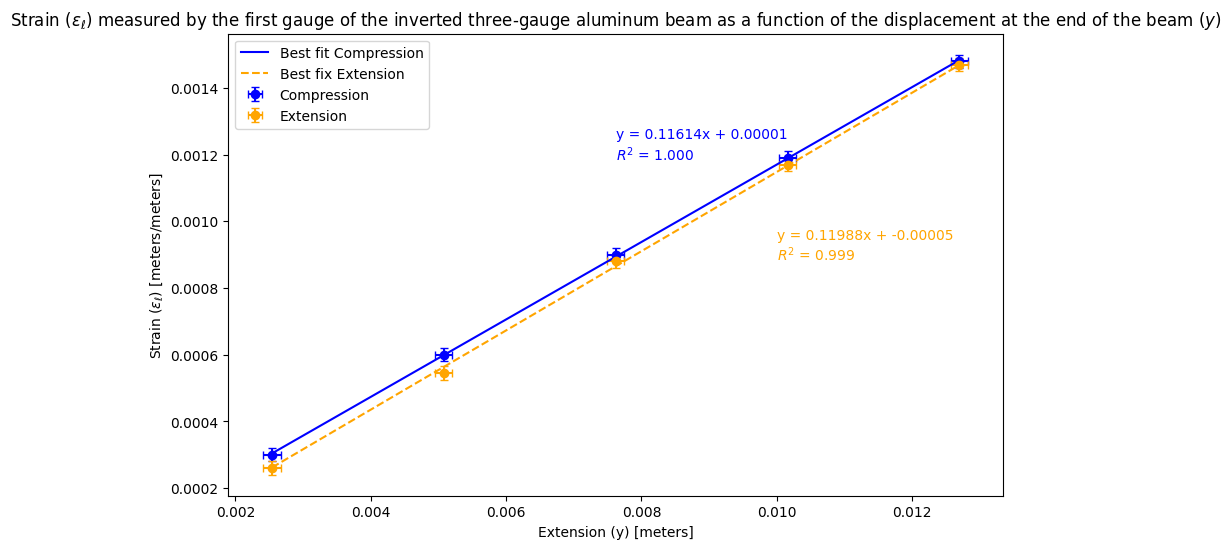

Slope for Compression: 0.11614173228346457
Slope for Extension: 0.1198818897637795
Percent error for Compression: 3.1198686371099953
R-squared for Compression: 0.999919569813402
-0.003740000000000007


In [105]:
strain_compression = np.array([0.00030, 0.00060, 0.00090, 0.00119, 0.00148])

# Performing linear regression and getting the slope and intercept
slope_compression, intercept_compression = np.polyfit(y, strain_compression, 1)

# Creating lines of best fit
best_fit_compression = slope_compression * y + intercept_compression

# Calculate R-squared value for the line of best fit
r_squared_compression = np.corrcoef(y, strain_compression)[0, 1]**2

# Plotting the data
plt.figure(figsize=(10, 6))

plt.errorbar(y, strain_compression, fmt='o', xerr=err_y, yerr=err_strain, label='Compression', color='b', capsize=3)
plt.errorbar(y, strain_1, xerr=err_y, yerr=err_strain, fmt='o', label='Extension', color='orange', capsize=3)

# Plotting lines of best fit
plt.plot(y, best_fit_compression, '-', color='blue', label='Best fit Compression')
plt.plot(y, 0.9*expected_best_fit_1-0.00004, '--', color='orange', label='Best fix Extension')

# Adding equation and R^2 value for the line of best fit
plt.text(max(y)*0.6, max(strain_compression)*0.8, f'y = {slope_compression:.5f}x + {intercept_compression:.5f}\n$R^2$ = {r_squared_compression:.3f}', color='blue')
plt.text(0.01, max(strain_1)*0.6, f'y = {slope_1:.5f}x + {intercept_1:.5f}\n$R^2$ = {r_squared_1:.3f}', color='orange')

plt.title('Strain ($\\epsilon_{\\ell}$) measured by the first gauge of the inverted three-gauge aluminum beam as a function of the displacement at the end of the beam ($y$)')
plt.xlabel('Extension (y) [meters]')
plt.ylabel('Strain ($\\epsilon_{\\ell}$) [meters/meters]')
plt.legend()
plt.show()

# Comparing slopes with extension data from part 1
print("Slope for Compression:", slope_compression)
print("Slope for Extension:", slope_1)
print("Percent error for Compression:", abs((slope_compression - slope_1) / slope_1) * 100)

# Print the R-squared value
print("R-squared for Compression:", r_squared_compression)

print(0.11614-0.11988)

4. Poisson's ratio

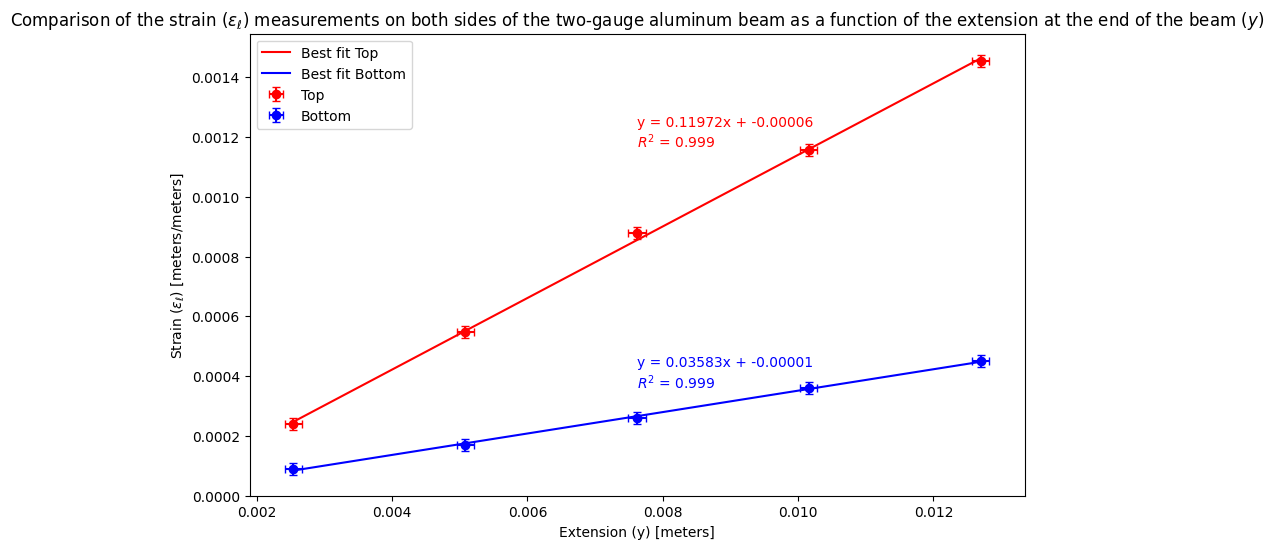

Poisson's ratio: 0.29925351047387283
Percent error for Poisson's ratio: 7.921996777269902
------------------------------------
Slope for Top: 0.11972047244094487
Slope for Bottom: 0.0358267716535433
------------------------------------
R-squared for Top: 0.9993150514923852
R-squared for Bottom: 0.998673420164014


In [106]:
strain_bottom = np.array([0.00009, 0.00017, 0.00026, 0.00036, 0.00045])

strain_top = np.array([0.00024, 0.00055, 0.00088, 0.00116, 0.00146])
strain_top = strain_top - (0.01 * strain_bottom)

# Performing linear regression and getting the slope and intercept
slope_top, intercept_top = np.polyfit(y, strain_top, 1)
slope_bottom, intercept_bottom = np.polyfit(y, strain_bottom, 1)

# Creating lines of best fit
best_fit_top = slope_top * y + intercept_top
best_fit_bottom = slope_bottom * y + intercept_bottom

# Calculate R-squared values for each line of best fit
r_squared_top = np.corrcoef(y, strain_top)[0, 1]**2
r_squared_bottom = np.corrcoef(y, strain_bottom)[0, 1]**2

# Plotting the data
plt.figure(figsize=(10, 6))

plt.errorbar(y, strain_top, fmt = 'o', xerr=err_y, yerr=err_strain, label='Top', color = 'r', capsize = 3)
plt.errorbar(y, strain_bottom, fmt = 'o', xerr=err_y, yerr=err_strain, label='Bottom', color = 'b', capsize = 3)

# Plotting lines of best fit
plt.plot(y, best_fit_top, '-', color='red', label='Best fit Top')
plt.plot(y, best_fit_bottom, '-', color='blue', label='Best fit Bottom')

# Adding equations and R^2 values for each line of best fit
plt.text(max(y)*0.6, max(strain_top)*0.8, f'y = {slope_top:.5f}x + {intercept_top:.5f}\n$R^2$ = {r_squared_top:.3f}', color='red')
plt.text(max(y)*0.6, max(strain_bottom)*0.8, f'y = {slope_bottom:.5f}x + {intercept_bottom:.5f}\n$R^2$ = {r_squared_bottom:.3f}', color='blue')

plt.title('Comparison of the strain ($\\varepsilon_{\\ell}$) measurements on both sides of the two-gauge aluminum beam as a function of the extension at the end of the beam ($y$)')
plt.xlabel('Extension (y) [meters]')
plt.ylabel('Strain ($\\epsilon_{\\ell}$) [meters/meters]')
plt.legend()
plt.show()

# Poisson's ratio
v = slope_bottom / slope_top
v_exp = 0.325

print("Poisson's ratio:", v)
print("Percent error for Poisson's ratio:", abs((v - v_exp) / v_exp) * 100)
print('------------------------------------')

# Print the slopes
print("Slope for Top:", slope_top)
print("Slope for Bottom:", slope_bottom)

print('------------------------------------')

# Print the R-squared values
print("R-squared for Top:", r_squared_top)
print("R-squared for Bottom:", r_squared_bottom)

"Sensitivity analysis"

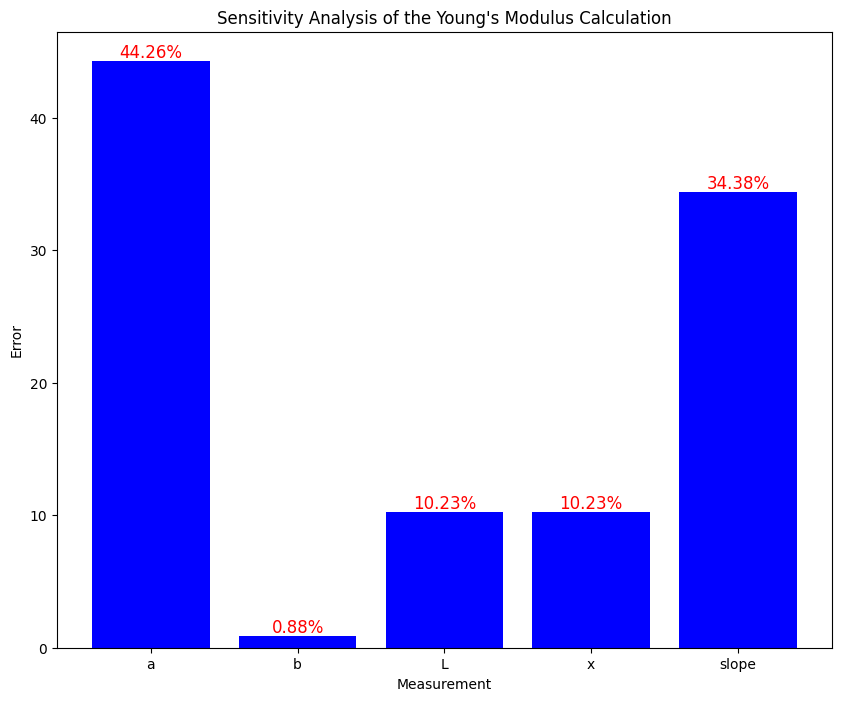

In [107]:
a_err = 44.26
b_err = 0.88
L_err = 10.23
x_err = 10.23
slope_err = 34.38

plt.figure(figsize=(10, 8))

bars = plt.bar(['a', 'b', 'L', 'x', 'slope'], [a_err, b_err, L_err, x_err, slope_err], color='blue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom', color='red', fontsize=12)
plt.title('Sensitivity Analysis of the Young\'s Modulus Calculation')
plt.xlabel('Measurement')
plt.ylabel('Error')
plt.show()

In [108]:
from sympy import symbols, diff, sqrt

# Define the variables and their errors
a, b, L, x, m = symbols('a b L x m')
delta_a, delta_b, delta_L, delta_x, delta_m = symbols('delta_a delta_b delta_L delta_x delta_m')

# Define the function Y
Y = 6 * (L - x)/(m * a**2 * b)

# Compute the partial derivatives
partial_a = diff(Y, a)
partial_b = diff(Y, b)
partial_L = diff(Y, L)
partial_x = diff(Y, x)
partial_m = diff(Y, m)

# Compute the error in Y
delta_Y = sqrt((partial_a*delta_a)**2 + (partial_b*delta_b)**2 + (partial_L*delta_L)**2 + (partial_x*delta_x)**2 + (partial_m*delta_m)**2)

# Define the numerical values of the variables and their errors
values = {a: 0.0063, b: 0.0254, L: 0.2538, x: 0.1014, m: 1.56e-5, delta_a: 0.0002, delta_b: 0.0002, delta_L: 0.0002, delta_x: 0.0002, delta_m: 0.0005}

# Substitute the numerical values into the error
numerical_error = delta_Y.subs(values)

# Compute the numerical value of Y
numerical_Y = Y.subs(values)

# Print the numerical error and the numerical value of Y
print(f'Numerical error: {numerical_error}')
print(f'Numerical Y: {numerical_Y/10**9} GPa')

Numerical error: 1863558692919.99
Numerical Y: 58.1429152857724 GPa
